In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import os
os.chdir('drive/Tensorflow/CIFAR-10')

### Load data CIFAR-10

In [0]:
import numpy as np
import pickle
import urllib.request
import tarfile
import zipfile
import pickle

In [0]:
#Define the path to contain data
data_path='data/CIFAR-10'

#Define the path to get data from Internet
url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

#Width and height for the images
img_size=32

#Number channels 
num_channels=3

#Number of classes
num_classes=10

#Number the files for training set
_num_files_train=5

#Number the images per file
_num_imgages_per_file=10000

In [8]:
url.split('/')[-1]

'cifar-10-python.tar.gz'

In [0]:
#Define fuction to download data from Internet and extract it

def download_and_extract(url, down_dir):
    """
    Download and extract the data if it doesn't already exist.
    Assumes the url is a tar-ball file.
    url --string :
        Internet URL for the tar-file to download.
    download_dir-- string:
        Directory where the downloaded file is saved.
        Example: "data/CIFAR-10/"
    :return:
        Nothing.
    """ 

    #Define the file name for saving in local machine
    file_name=url.split('/')[-1]
    file_path=os.path.join(down_dir ,file_name)

    #Check the file already downloaded or not
    if not os.path.exists(file_path):
        #Check the down_dir existed or noe
        if not os.path.exists(down_dir):
            os.makedirs(down_dir)
        
        #Start downloading data from the url

        file_path, _= urllib.request.urlretrieve(url=url, filename=file_path)

        print('Download successfully')

        #Extract file

        if file_path.endswith(".zip"):
            zipfile.ZipFile(file=file_path, mode='r').extractall(down_dir)

        elif file_path.endswith((".tar.gz", ".tgz")):
            tarfile.open(name=file_path, mode='r:gz').extractall(down_dir)

        print('Extract successfully')
    else:
        print('File already dowloaded')

In [0]:
#Define fuction to unpickle data

def unpickle(filename):
    #get the full path of file
    file_path=os.path.join(data_path, "cifar-10-batches-py/", filename)

    print('Loadind data: '+ file_path)

    with open(file_path, 'rb') as file:
        data= pickle.load(file, encoding='bytes')
    return data

In [0]:
def load_data(filename):

    #Get the raw data and labels from the funtion 'unpickle'
    data=unpickle(filename)
    raw_imgs=np.array(data[b'data'])
    classes=np.array(data[b'labels'])
    
    #Reshape images into our dimension
    imgs=raw_imgs.reshape([-1, num_channels, img_size, img_size])

    #Transpose to reoder the dimension
    imgs=imgs.transpose([0,2,3,1])
    
    return imgs, classes

In [0]:
#Define fuction to load the class name
def load_class_name():
    #Load data from 'batches.meta' location

    raw_data= unpickle('batches.meta')[b'label_names']

    #Encode data to string
    names=[x.decode('utf-8') for x in raw_data]
    return names

In [0]:
#Define fuction to load training set
def load_training_data():

    #Define the zero array to pre-allocte training set

    imgs=np.zeros([_num_files_train*_num_imgages_per_file, img_size, img_size, num_channels], dtype=int)
    labels= np.zeros([_num_files_train*_num_imgages_per_file], dtype=int)

    #The starting index of batches
    j=0
    for i in range(_num_files_train):
        images_batch, classes_batch=load_data('data_batch_' + str(i+1))

        #get the length of images_batch
        num_imgs=len(images_batch)
        #Plug this images to our array
        
        imgs[j: j+num_imgs, :]=images_batch
        labels[j: j+num_imgs]=classes_batch
        j+=num_imgs

    #Convert the labels into one hot vector
    one_hot=np.eye(num_classes)[labels.reshape(-1)]

    return imgs, one_hot, labels

In [0]:
#Define the function to load test set
def load_test_data():
    imgs, labels=load_data('test_batch')
    #Convert to one hot vector
    one_hot=np.eye(num_classes)[labels.reshape(-1)]
    return imgs, one_hot, labels

In [27]:
# Download data 
download_and_extract(url, data_path)

Download successfully
Extract successfully


In [28]:
#Get the class names
class_names=load_class_name()
print(class_names)

Loadind data: data/CIFAR-10/cifar-10-batches-py/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [45]:
# Load training set
X_train_org, y_train, y_train_cls=load_training_data()
print('Shape of the training set {0}'.format(X_train_org.shape))
print('Shape of the training one hot label {0}'.format(y_train.shape))
print('Shape of the training lable {0}'.format(y_train_cls.shape))

Loadind data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loadind data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loadind data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loadind data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loadind data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Shape of the training set (50000, 32, 32, 3)
Shape of the training one hot label (50000, 10)
Shape of the training lable (50000,)


In [47]:
#Load test set
X_test_org, y_test, y_test_cls=load_test_data()
print('Shape of the test set {0}'.format(X_test_org.shape))
print('Shape of the test one hot label {0}'.format(y_test.shape))
print('Shape of the test lable {0}'.format(y_test_cls.shape))

Loadind data: data/CIFAR-10/cifar-10-batches-py/test_batch
Shape of the test set (10000, 32, 32, 3)
Shape of the test one hot label (10000, 10)
Shape of the test lable (10000,)


### Visualize the images

In [0]:
import matplotlib.pyplot as plt

In [0]:
#Define function to plot the image
def plot_images(images, cls_true, cls_pred=None):
    plt.figure(figsize=(5,5))
    
    for i in range(min(9, len(images))):
        plt.subplot(3,3,i+1)

        if cls_pred is None:
            plt.xlabel('True: {0}'.format(class_names[cls_true[i]]))
        else:
            plt.xlabel('True: {0}, Pred: {0}'.format(class_names[cls_true[i]], class_names[cls_pred[i]]))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
    plt.show()

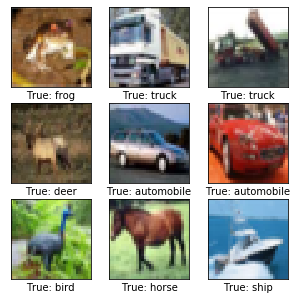

In [52]:
plot_images(X_train_org, y_train_cls)

In [0]:
#Define the function to plot the wrong prediction
def plot_incorrect_imagers(images,cls_true, cls_pred):
    plt.figure(figsize=(5,5))

    incorrect= cls_true != cls_pred
    incorret_images=images[incorrect]
    
    plot_images(incorret_images,cls_true[incorrect],cls_pred[incorrect] )